# Visualization 2

- Advanced visualization, example: https://trailsofwind.figures.cc/
- Custom visualization steps:
    - draw "patches" (shapes) on the screen (what):
        - lines
        - polygons
        - circle
        - text
    - location of the "patches" on the screen (where):
        - X & Y co-ordinate
        - "Coordinate Reference System (CRS)":
            - takes some X & Y and maps it on to actual space on screen
            - several CRS

### Transformers: let us pick a Coordinate Reference System (CRS)

- Documentation: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html
- `ax.transData`: default
- `ax.transAxes` and `fig.transFigure`:
    - (0, 0) is bottom left
    - (1, 1) is top right
        - these are true immaterial of the axes limits
- `None` or `IdentityTransform()`: disabling CRS

### Mix and match

- `ax.transData.transform((x, y))`: converts axes / data coords into raw coordinates
- How to draw an arrow:
    `matplotlib.patches.FancyArrowPatch((<x1>, <y1>), (<x2>, (<y2>)), transform=None, arrowstyle=<STYLE>)`
    - arrowstyle="simple,head_width=10,head_length=10"

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

# new import statements
import geopandas as gpd

from shapely.geometry import Point, Polygon, box

382.2164351851851 209.11111111111111


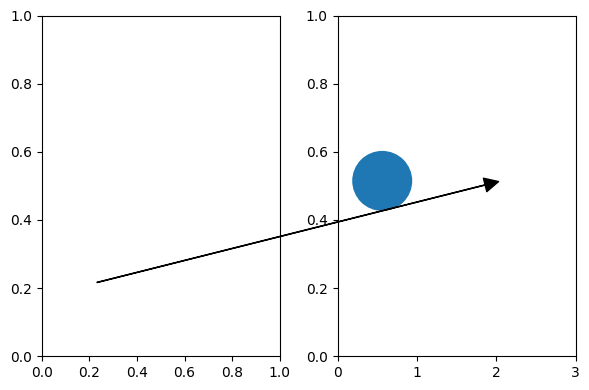

In [2]:
# GOAL: draw a visual circle at axes / data coords 0.5, 0.5 
# with raw co-ordinate radius 30 on right subplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4))
ax2.set_xlim(0, 3)

# crop now (after .transform, we don't want to move anything!)
plt.tight_layout() 

x, y = ax2.transData.transform((0.5, 0.5))
print(x, y)
# Draw a circle at (x, y) with radius 30 and set transform to None
c = plt.Circle((x, y), 30, transform=None)
ax2.add_artist(c)

# GOAL: arrow from 0.2, 0.2 (left) to 2, 0.5 (right)
# Use axes / data coords from one subplot to another subplot
x1, y1 = ax1.transData.transform((0.2, 0.2))
x2, y2 = ax2.transData.transform((2, 0.5))
# arrowstyle="simple,head_width=10,head_length=10"
arrow = matplotlib.patches.FancyArrowPatch((x1, y1), (x2, y2), transform=None, color="k",
                                           arrowstyle="simple,head_width=10,head_length=10")
fig.add_artist(arrow)

### Custom Scatter Plots with Angles

In [3]:
df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180


2 5 90
3 1 0
6 6 45
8 1 180


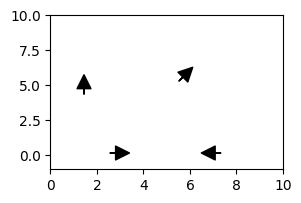

In [4]:
fig, ax = plt.subplots(figsize=(3,2))
ax.set_xlim(0, 10)
ax.set_ylim(-1, 10)

for row in df.itertuples():
    print(row.x, row.y, row.a)
    # v1: draw a circle of radius 10 for each scatter point
    
    # x, y = ax.transData.transform((row.x, row.y))
    # c = plt.Circle((x,y), radius=10, transform=None)
    # ax.add_artist(c)
    
    # v2: draw an arrow for each scatter point (correct angle)
    x, y = ax.transData.transform((row.x, row.y))
    # Calculate angle: math.radians(row.a)
    a = math.radians(row.a)
    # Calculate end axes / data coords using math.cos and math.sin
    x_diff = math.cos(a) * 25
    y_diff = math.sin(a) * 25
    c = matplotlib.patches.FancyArrowPatch((x,y), (x+x_diff, y+y_diff),transform=None, color="k",
                                           arrowstyle="simple,head_width=10,head_length=10")
    ax.add_artist(c)

### Plot annotations

- Target plot:

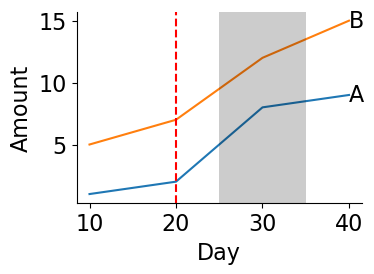

- `ax.text(<x>, <y>, <text>, ha=<someval>, va=<someval>)`
    - `ha`: horizontalalignment
    - `va`: verticalalignment
        - enables us to modify "anchor" of the text
    
### More patches
- `plt.Line2D((<x1>, <x2>), (<y1>, <y2>)))`
- `matplotlib.patches.FancyArrowPatch((<x1>, <y1>), (<x2>, (<y2>))`
- `plt.Rectangle((<x>,<y>), <width>, <height>)`

,A,B
10,1,5
20,2,7
30,8,12
40,9,15


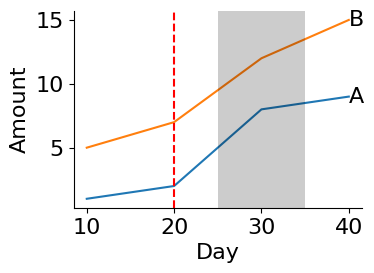

In [5]:
plt.rcParams["font.size"] = 16
df = pd.DataFrame({"A": [1,2,8,9], "B": [5,7,12,15]}, index=[10,20,30,40])
ax = df.plot.line(figsize=(4,3), legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("Amount")
plt.tight_layout()
# Enables us to control borders (aka spines)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 1. Replace legened with line labels
for col in df.columns:
    ax.text(df.index[-1], df[col].iat[-1], col, ha="left", va="center")

# 2. Draw a vertical line at x=20
p = plt.Line2D((20, 20), ax.get_ylim(), color="r", linestyle="--")
ax.add_artist(p)

# 3. Highlight a region from x=25 to x=35
p = plt.Rectangle((25, 0), 10, ax.get_ylim()[1], color="k", zorder=50, alpha=0.2, linewidth=0)
ax.add_artist(p)

df

### Geographic Data / Maps

#### Installation
```python
pip3 install --upgrade pip
pip3 install geopandas shapely descartes geopy netaddr
sudo apt install -y python3-rtree
```

- `import geopandas as gpd`
- `.shp` => Shapefile
- `gpd.datasets.get_path(<shp file path>)`:
    - example: `gpd.datasets.get_path("naturalearth_lowres")`
- `gpd.read_file(<path>)`

In [6]:
!ls /home/msyamkumar/.local/lib/python3.10/site-packages/geopandas/datasets/naturalearth_lowres

naturalearth_lowres.cpg  naturalearth_lowres.prj  naturalearth_lowres.shx
naturalearth_lowres.dbf  naturalearth_lowres.shp


In [7]:
!ls /home/msyamkumar/.local/lib/python3.10/site-packages/geopandas/datasets

__init__.py  naturalearth_cities       naturalearth_lowres
__pycache__  naturalearth_creation.py  nybb_16a.zip


In [8]:
# Find the path for "naturalearth_lowres"
path = gpd.datasets.get_path("naturalearth_lowres")
# Read the shapefile for "naturalearth_lowres" and
# set index using "name" column
gdf = gpd.read_file(path).set_index("name")

In [9]:
gdf.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
type(gdf).__mro__

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [11]:
# All shapefiles have a column called "geometry"
gdf["geometry"]

name
Fiji                        MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
Tanzania                    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
W. Sahara                   POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
Canada                      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
United States of America    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                                                  ...                        
Serbia                      POLYGON ((18.82982 45.90887, 18.82984 45.90888...
Montenegro                  POLYGON ((20.07070 42.58863, 19.80161 42.50009...
Kosovo                      POLYGON ((20.59025 41.85541, 20.52295 42.21787...
Trinidad and Tobago         POLYGON ((-61.68000 10.76000, -61.10500 10.890...
S. Sudan                    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

In [12]:
type(gdf["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

Fiji


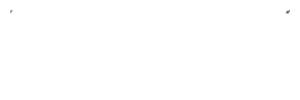

In [13]:
# First country's geometry
print(gdf.index[0])
gdf["geometry"].iat[0]

Tanzania


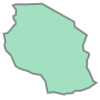

In [14]:
# Second country's geometry
print(gdf.index[1])
gdf["geometry"].iat[1]

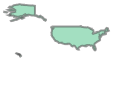

In [15]:
# Geometry for "United States of America"
gdf.at["United States of America", "geometry"]

In [16]:
# Type of Tanzania's geometry
print(gdf.index[1], type(gdf["geometry"].iat[1]))

# Type of United States of America's geometry
print("United States of America", type(gdf.at["United States of America", "geometry"]))

Tanzania <class 'shapely.geometry.polygon.Polygon'>
United States of America <class 'shapely.geometry.multipolygon.MultiPolygon'>


- `gdf.plot(figsize=(<width>, <height>), column=<column name>)`
- `ax.set_axis_off()`

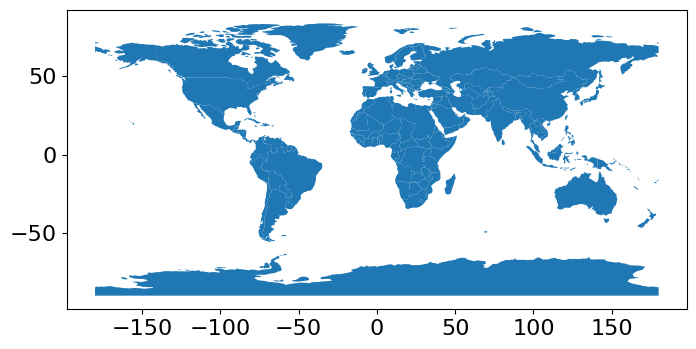

In [17]:
ax = gdf.plot(figsize=(8,4))

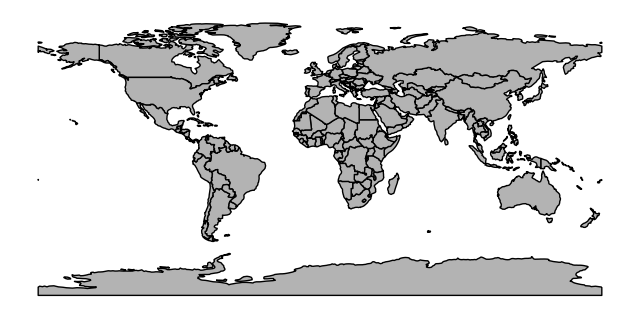

In [18]:
# Set facecolor="0.7", edgecolor="black"
ax = gdf.plot(figsize=(8,4), facecolor="0.7", edgecolor="black")
# Turn off the axes
ax.set_axis_off()

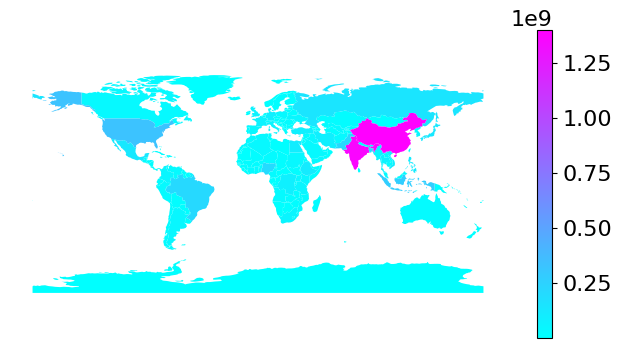

In [19]:
# Color the map based on population column and set cmap="cool"
ax = gdf.plot(figsize=(8,4), column="pop_est", legend=True, cmap="cool")
ax.set_axis_off()

#### Create a map where countries with >100M people are red, others are gray.

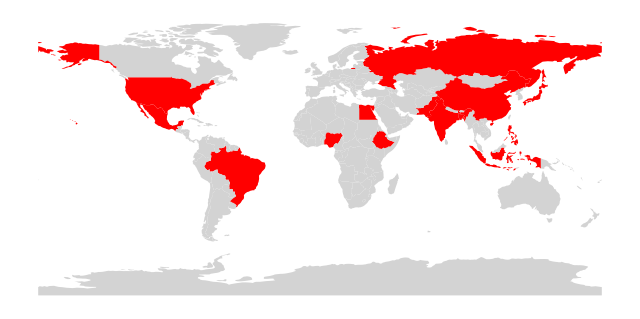

In [20]:
# Create a map where countries with >100M people are red, others are gray

# Add a new column called color to gdf and set default value to "lightgray"
gdf["color"] = "lightgray"
# Boolean indexing to set color to red for countries with "pop_est" > 1e8
gdf.loc[gdf["pop_est"] > 1e8, "color"] = "red"
# Create the plot
ax = gdf.plot(figsize=(8,4), color=gdf["color"])
ax.set_axis_off()

### Shapely shapes

- `from shapely.geometry import Point, Polygon, box`
- `Polygon([(<x1>, <y1>), (<x2>, <y2>), (<x3>, <y3>), ...])`
- `box(<x1>, <x2>, <y1>, <y2>)`
- `Point(<x>, <y>)`
- `<shapely object>.buffer(<size>)`
    - example: `Point(5, 5).buffer(3)` creates a circle
- Shapely methods:
    - `union`:  any point that is in either shape (OR)
    - `intersection`: any point that is in both shapes (AND)
    - `difference`: subtraction
    - `intersects`: do they overlap?

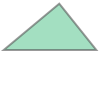

In [21]:
triangle = Polygon([(0, 0), (1.2, 1), (2, 0)])   # triangle
triangle

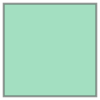

In [22]:
box1 = box(0,0,1,1)
box1

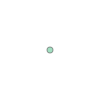

In [23]:
point = Point(5, 5)
point

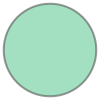

In [24]:
circle = point.buffer(1)
circle

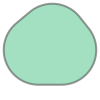

In [25]:
triangle_buffer = triangle.buffer(3)
triangle_buffer

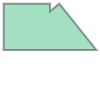

In [26]:
triangle.union(box1)   # any point that is in either shape (OR)

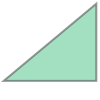

In [27]:
triangle.intersection(box1)   # any point that is in both shapes (AND)

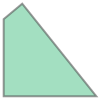

In [28]:
triangle.difference(box1)   # subtraction

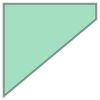

In [29]:
box1.difference(triangle)   # subtraction

In [30]:
triangle.intersects(box1) # do they overlap?

True

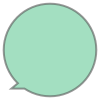

In [31]:
# is the point "near" (<6 units) the triangle?
triangle.union(point.buffer(6))

In [32]:
triangle.intersects(point.buffer(6))

True

<AxesSubplot:>

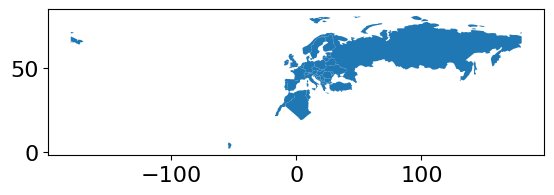

In [33]:
# Europe bounding box
b = box(-10.67, 34.5, 31.55, 71.05)

# attempt 1
gdf[gdf.intersects(b)].plot()

/home/msyamkumar/.local/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


<AxesSubplot:>

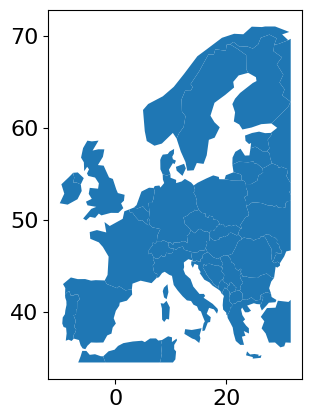

In [34]:
eur1 = gdf.intersection(b)
eur1.plot()

In [35]:
eur2 = eur1[~eur1.is_empty]
eur2

name
Russia              MULTIPOLYGON (((31.54002 52.74205, 31.30520 53...
Norway              POLYGON ((29.39955 69.15692, 28.59193 69.06478...
France              MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...
Tunisia             POLYGON ((8.14098 34.65515, 8.37637 35.47988, ...
Algeria             POLYGON ((-1.79299 34.52792, -2.16991 35.16840...
Sweden              POLYGON ((11.46827 59.43239, 12.30037 60.11793...
Belarus             POLYGON ((29.22951 55.91834, 29.37157 55.67009...
Ukraine             POLYGON ((30.74875 46.58310, 30.37761 46.03241...
Poland              POLYGON ((23.52754 53.47012, 23.80493 53.08973...
Austria             POLYGON ((16.90375 47.71487, 16.34058 47.71290...
Hungary             POLYGON ((22.64082 48.15024, 22.71053 47.88219...
Moldova             POLYGON ((26.85782 48.36821, 27.52254 48.46712...
Romania             POLYGON ((28.67978 45.30403, 29.14972 45.46493...
Lithuania           POLYGON ((26.58828 55.16718, 25.76843 54.84696...
Latvia         

<AxesSubplot:>

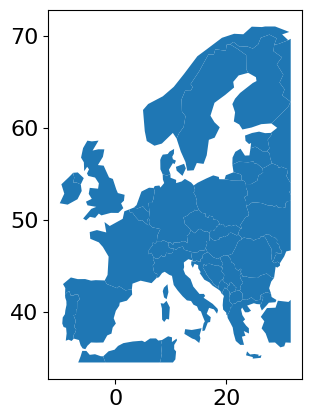

In [36]:
eur2.plot()